<p style="font-size:40px;text-align:center;color:yellow"> <b>Taxi demand prediction in New York City</b> </p>


In [ ]:
# <img src='images/new_york.gif' width='800px'>

# - Objectives 
- Our end-user is an `Taxi-Driver`, who is probably going to use this on his smartphone.
- So our primary Objective is to `Predict the number of pickups as accurately as possible for aech region in next 10mins (in 10mins interval)`.
- So according to the objective we need to divide the NYC into various regions. 
- For our model, at any time input will be :
> 1) Current location of the taxi, hence we will get the region (pre-defined by us) in which the TaxiDriver is present. <br>
> 2) Current time. So for eg. say we get current time as 2:00 pm, then we need to do the estimation for next 10 min interval i.e 2:00 - 2:10 pm
- So our output would be - 'output is specified as our primary objective'

# - Constraints
1) Latency : We have decent Latency requirements. It is not as low as in miliseconds as required for internet applicarions, but it should not be as high as in minutes. Ideal waiting time would be some seconds, 15-45 seconds as per me. <br>
2) Intrepretability : Is not important, as long as you provide with correct predictions no TaxiDriver is keen on knowing 'on what basis we obtained that number'. It is not as in medical applications where doctors need to know thw reasons behind the predictions. <br>
3) Relative Errors : Say in some A case we predicted 'no of pickups' as 100 and in reality there were 102. So our absolute error is 2. Now consider case B where we predicted 10 and there were 8. So here the absolute error is 2. Now in both the cases the absolute error is 2. But the same error makes lage difference in case B as compared to case A.
>So here we wil introduce relative error, which is percentage error. Then the relative percentage error for Case A is 2% but that for case B is 20%. So if we say that our relative percentage error is about 10%, then the TaxiDriver will know how to percieve the predictions provided by us. For eg.if the prediction says 250 the TaxiDriver will percieve it as between 225-275.

# - Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 
(2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

* ## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# - Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table border="1">
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

## `As you can see the size of each csv is tremendous between 1.5-2gb. So using Pandas is not an option as such an large amount of data will not fit in our RAM (2*4 = 8 gb). Hence we are expoiting other libraries. But in our case we can load 8gb data into Ram as we have 24gb of it. So basically we can use pandas`

In [1]:
import os
import math
import time
import pickle
from datetime import datetime

import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from matplotlib import rcParams
%matplotlib inline
# matplotlib.use('nbagg')
import seaborn as sns

import gpxpy.geo
import dask.dataframe as dd
import folium

import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import MiniBatchKMeans, KMeans

# mingw_path = 'C:\\Program Files (x86)\\mingw-w64\\i686-8.1.0-posix-dwarf-rt_v6-rev0\\mingw32\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('data/yellow_tripdata_2016-03.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [5]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive

# os.environ["PATH"] += os.pathsep + 'C:\\Users\\magic\\anaconda3\\envs\\ml1\\Library\\bin\\graphviz' # run this if graphviz shows error
month.visualize(filename='images/viz/one.svg');

In [6]:
month.fare_amount.sum().visualize(filename='images/viz/two.svg');

* ## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>
	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

 # - ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# - Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.


----

# - Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [13]:
month.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [20]:
len(month)

12210952

In [21]:
# other way
month.shape[0].compute(),month.shape[1]

(12210952, 19)

### 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [24]:
# This is the dataframe without pickup outliers
month[month['pickup_longitude'].between(-74.15,-73.7004) | month['pickup_latitude'].between(40.5774,40.9176)].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
5         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
6         2  2016-03-01 00:00:00   2016-03-01 00:00:00                6   
7         1  2016-03-01 00:00:01   2016-03-01 00:16:04                1   
8         1  2016-03-01 00:00:01   2016-03-01 00:05:00                1   
9         2  2016-03-01 00:00:01   2016-03-01 00:24:06                3   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   
5           5.92        -74.017197        40.705383           1   
6           5.72        -73.994583        40.727848           1   
7           6.20        -73.788773        40.647758           1   
8           0.70        -73.958221        40.764641           1   
9           7.18        -73.985779        40.741192           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   
5                  N         -73.978073         40.755787             1   
6                  N           0.000000          0.000000             2   
7                  N         -73.829208         40.712345             3   
8                  N         -73.967896         40.762901             1   
9                  N         -73.946350         40.797878             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   
5         23.5    1.0      0.5        5.06          0.00   
6         23.0    0.5      0.5        0.00          0.00   
7         20.5    0.5      0.5        0.00          0.00   
8          5.5    0.5      0.5        2.00          0.00   
9         23.5    0.5      0.5        3.20          0.00   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80  
5                    0.3         30.36  
6                    0.3         24.30  
7                    0.3         21.80  
8                    0.3          8.80  
9                    0.3         28.00

In [34]:
month[month['pickup_longitude'].between(-74.15,-73.7004) | month['pickup_latitude'].between(40.5774,40.9176)].shape[0].compute()

12028245

#### ` Here i am trying to avoid to create temporary variables so as to not store junk in ram, as the dat we are playing with is tremendiously large in size`

In [29]:
# This is the Dataframe with the outliers
month[~month['pickup_longitude'].between(-74.15,-73.7004) | ~month['pickup_latitude'].between(40.5774,40.9176)].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
95           2  2016-03-01 00:00:31   2016-03-01 00:09:06                1   
116          2  2016-03-01 00:00:41   2016-03-01 00:11:39                1   
365          2  2016-03-10 07:08:29   2016-03-10 07:32:55                2   
434          2  2016-03-10 07:08:57   2016-03-10 07:09:03                6   
478          2  2016-03-10 07:09:15   2016-03-10 07:40:06                1   
491          2  2016-03-10 07:09:20   2016-03-10 07:17:52                5   
646          2  2016-03-10 07:10:28   2016-03-10 07:21:24                1   
866          2  2016-03-10 07:11:51   2016-03-10 07:17:30                1   
984          2  2016-03-10 07:12:35   2016-03-10 07:24:55                1   
1407         2  2016-03-10 07:15:16   2016-03-10 07:31:35                2   

      trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
95             0.73        -74.651306        40.609261           1   
116            2.91          0.000000         0.000000           1   
365            8.81          0.000000         0.000000           1   
434            0.02          0.000000         0.000000           1   
478           18.05          0.000000         0.000000           3   
491            1.73          0.000000         0.000000           1   
646            2.86          0.000000         0.000000           1   
866            0.91          0.000000         0.000000           1   
984            1.71          0.000000         0.000000           1   
1407           2.89          0.000000         0.000000           1   

     store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
95                    N         -74.651306         40.609261             1   
116                   N           0.000000          0.000000             1   
365                   N           0.000000          0.000000             1   
434                   N         -73.972359         40.794121             2   
478                   N           0.000000          0.000000             1   
491                   N           0.000000          0.000000             1   
646                   N           0.000000          0.000000             1   
866                   N           0.000000          0.000000             1   
984                   N           0.000000          0.000000             2   
1407                  N           0.000000          0.000000             2   

      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
95            6.5    0.5      0.5        1.00          0.00   
116          12.0    0.5      0.5        3.32          0.00   
365          28.0    0.0      0.5       10.30          5.54   
434           2.5    0.0      0.5        0.00          0.00   
478          66.0    0.0      0.0       16.36         15.50   
491           8.0    0.0      0.5        1.76          0.00   
646          11.0    0.0      0.5        2.36          0.00   
866           6.0    0.0      0.5        2.04          0.00   
984          10.0    0.0      0.5        0.00          0.00   
1407         13.5    0.0      0.5        0.00          0.00   

      improvement_surcharge  total_amount  
95                      0.3          8.80  
116                     0.3         16.62  
365                     0.3         44.64  
434                     0.3          3.30  
478                     0.3         98.16  
491                     0.3         10.56  
646                     0.3         14.16  
866                     0.3          8.84  
984                     0.3         10.80  
1407                    0.3         14.30

In [35]:
month[~month['pickup_longitude'].between(-74.15,-73.7004) | ~month['pickup_latitude'].between(40.5774,40.9176)].shape[0].compute()

185746

In [32]:
# Summing up the length of dataframe without outliers and an dataframe of outliers. This should equal to 12210952, the original shape of the complete dataframe
12028245 + 185746

12213991

In [41]:
12213991-12210952

3039

In [45]:
month[(~month['pickup_longitude'].between(-74.15,-73.7004) & ~month['pickup_latitude'].between(40.5774,40.9176))==(month['pickup_longitude'].between(-74.15,-73.7004) & month['pickup_latitude'].between(40.5774,40.9176))].shape[0].compute()

3039

In [46]:
month[((~month['pickup_longitude'].between(-74.15,-73.7004)) & (~month['pickup_latitude'].between(40.5774,40.9176)))==(month['pickup_longitude'].between(-74.15,-73.7004) & month['pickup_latitude'].between(40.5774,40.9176))].head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
95            2  2016-03-01 00:00:31   2016-03-01 00:09:06                1   
9922          2  2016-03-10 08:00:55   2016-03-10 08:03:20                1   
10181         2  2016-03-10 08:02:13   2016-03-10 08:09:02                1   
20882         2  2016-03-10 08:57:02   2016-03-10 08:57:07                2   
29620         2  2016-03-10 09:45:10   2016-03-10 09:45:12                2   
34528         2  2016-03-10 10:14:27   2016-03-10 10:26:26                1   
38597         2  2016-03-10 10:40:24   2016-03-10 10:42:41                1   
38829         2  2016-03-10 10:41:47   2016-03-10 10:47:55                3   
40469         2  2016-03-10 10:51:42   2016-03-10 10:54:05                1   
54389         2  2016-03-10 12:18:20   2016-03-10 12:21:49                1   
66038         1  2016-03-01 00:10:03   2016-03-01 00:10:37                1   
67377         2  2016-03-10 13:20:52   2016-03-10 13:21:59                3   
70983         2  2016-03-01 00:18:36   2016-03-01 00:24:34                1   
71193         1  2016-03-01 00:20:09   2016-03-01 00:20:38                1   
72570         2  2016-03-01 00:32:05   2016-03-01 00:46:10                1   
80189         1  2016-03-01 01:25:18   2016-03-01 01:26:16                1   
80695         1  2016-03-01 01:32:49   2016-03-01 01:33:04                1   
80879         1  2016-03-01 01:35:25   2016-03-01 01:37:11                1   
84917         2  2016-03-01 03:00:13   2016-03-01 03:28:17                2   
85463         2  2016-03-01 03:16:00   2016-03-01 03:16:09                1   

       trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
95              0.73        -74.651306        40.609261           1   
9922            1.51        -74.186760        40.697449           5   
10181           1.00        -74.184555        40.668911           1   
20882           0.00        -74.406517        40.859928           5   
29620           0.00        -73.693176        40.638042           5   
34528           4.49        -74.192940        40.682598           5   
38597           0.68        -74.229523        40.732571           1   
38829           0.63         -7.587607        40.760498           1   
40469           0.00        -73.805061        40.971306           5   
54389           1.47        -74.177849        40.828911           5   
66038           0.00        -73.832832        41.059826           5   
67377           0.00        -74.073082        41.034771           5   
70983           1.15        -74.651306        40.609261           1   
71193           1.00        -73.812035        40.982334           5   
72570           3.97        -74.501564        40.711903           1   
80189          28.50        -74.110451        41.002087           5   
80695           4.30        -73.619354        40.664433           1   
80879           4.30        -73.619339        40.664448           5   
84917          23.70        -74.000130        40.577213           1   
85463           0.00        -73.526367        40.766811           5   

      store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
95                     N         -74.651306         40.609261             1   
9922                   N         -74.177338         40.695122             1   
10181                  N         -74.003365         40.748787             1   
20882                  N         -74.406517         40.859928             1   
29620                  N         -73.693169         40.638031             1   
34528                  N         -74.216331         40.647751             2   
38597                  N         -74.226830         40.737019             2   
38829                  N         -73.979378         40.761581             1   
40469                  N         -73.805061         40.971302             1   
54389                  N         -74.197487         40.820438    

`But we do not get the results as expected, seems like some data points are getting included in both the dataframes. I tried to find out the solution but couldnt find it. So this remains mystery.`

In [52]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]
print(outlier_locations.shape[0].compute())
# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm;

185746


<b>Observation:-</b> `As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada`

### 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [51]:
# Plotting dropoff cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]
print(outlier_locations.shape[0].compute())
# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm;

204783


<b>Observation:-</b> `The observations here are similar to those obtained while analysing pickup latitude and longitude`

## 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [151]:
def dura_cal(x):
    try:
        return (datetime.strptime(x['tpep_dropoff_datetime'], '%Y-%m-%d %H:%M:%S')-datetime.strptime(x['tpep_pickup_datetime'], '%Y-%m-%d %H:%M:%S')).seconds/60
    except:
        return 0

In [9]:
def dura_cal1(x):
    return (datetime.strptime(x['tpep_dropoff_datetime'].iloc[0], '%Y-%m-%d %H:%M:%S')-datetime.strptime(x['tpep_pickup_datetime'].iloc[0], '%Y-%m-%d %H:%M:%S')).seconds/60
   

In [13]:
month.get_partition(0).loc[0].compute()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0            2.5        -73.976746        40.765152           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05           0.0   

   improvement_surcharge  total_amount  
0                    0.3         12.35

In [29]:
month.get_partition(0).loc[20].compute()['tpep_dropoff_datetime'].iloc[0]

'2016-03-01 00:06:11'

In [40]:
dura_cal(month.get_partition(0).loc[20].compute())

2016-03-01 00:06:11


6.116666666666666

In [11]:
# month['duration'] = month.apply(lambda x: dura_cal(x),axis=1).compute()
# month.head(25)

In [5]:
df = pd.read_csv('data/yellow_tripdata_2016-03.csv')

In [12]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
5         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
6         2  2016-03-01 00:00:00   2016-03-01 00:00:00                6   
7         1  2016-03-01 00:00:01   2016-03-01 00:16:04                1   
8         1  2016-03-01 00:00:01   2016-03-01 00:05:00                1   
9         2  2016-03-01 00:00:01   2016-03-01 00:24:06                3   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   
5           5.92        -74.017197        40.705383           1   
6           5.72        -73.994583        40.727848           1   
7           6.20        -73.788773        40.647758           1   
8           0.70        -73.958221        40.764641           1   
9           7.18        -73.985779        40.741192           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   
5                  N         -73.978073         40.755787             1   
6                  N           0.000000          0.000000             2   
7                  N         -73.829208         40.712345             3   
8                  N         -73.967896         40.762901             1   
9                  N         -73.946350         40.797878             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   
5         23.5    1.0      0.5        5.06          0.00   
6         23.0    0.5      0.5        0.00          0.00   
7         20.5    0.5      0.5        0.00          0.00   
8          5.5    0.5      0.5        2.00          0.00   
9         23.5    0.5      0.5        3.20          0.00   

   improvement_surcharge  total_amount   duration  
0                    0.3         12.35   7.916667  
1                    0.3         15.35  11.100000  
2                    0.3         63.80  31.100000  
3                    0.3         41.62   0.000000  
4                    0.3        113.80   0.000000  
5                    0.3         30.36   0.000000  
6                    0.3         24.30   0.000000  
7                    0.3         21.80  16.050000  
8                    0.3          8.80   4.983333  
9                    0.3         28.00  24.083333

In [10]:
df['duration'] = df.apply(dura_cal,axis=1)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount   duration  
0                    0.3         12.35   7.916667  
1                    0.3         15.35  11.100000  
2                    0.3         63.80  31.100000  
3                    0.3         41.62   0.000000  
4                    0.3        113.80   0.000000

In [ ]:
def speed_cal(x):
    try:
        return df['trip_distance'] /(df['duration']/60)
    except:
        return 0 
    
df['speed'] = df.apply(speed_cal,axis=1)

In [ ]:
dfd = df[['passenger_count','trip_distance','duration','speed','tpep_pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].copy(False)

`I tried to compute the duration using the pandas methodology but, here we are being unsuccessful, it i staking either an tremendious amount of time or always crashing.. So we need to appreach this differently.`

In [5]:
datime = month[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance']].compute()

In [6]:
duration = datime.apply(dura_cal,axis=1)

In [7]:
df = month[['passenger_count','trip_distance','tpep_pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()

In [8]:
df['duration'] = duration

In [9]:
speed = 60*(df['trip_distance']/duration)

In [10]:
df['speed'] = speed

In [11]:
df

passenger_count  trip_distance tpep_pickup_datetime  pickup_longitude  \
0                    1           2.50  2016-03-01 00:00:00        -73.976746   
1                    1           2.90  2016-03-01 00:00:00        -73.983482   
2                    2          19.98  2016-03-01 00:00:00        -73.782021   
3                    3          10.78  2016-03-01 00:00:00        -73.863419   
4                    5          30.43  2016-03-01 00:00:00        -73.971741   
...                ...            ...                  ...               ...   
13037                1           0.00  2016-03-31 16:34:36          0.000000   
13038                1           0.40  2016-03-26 03:02:32        -73.977356   
13039                1          20.20  2016-03-20 08:43:59          0.000000   
13040                1          15.40  2016-03-20 08:49:47        -73.790077   
13041                1          17.50  2016-03-20 08:50:24        -73.798485   

       pickup_latitude  dropoff_longitude  dropoff_latitude  total_amount  \
0            40.765152         -74.004265         40.746128         12.35   
1            40.767925         -74.005943         40.733166         15.35   
2            40.644810         -73.974541         40.675770         63.80   
3            40.769814         -73.969650         40.757767         41.62   
4            40.792183         -74.177170         40.695053        113.80   
...                ...                ...               ...           ...   
13037         0.000000           0.000000          0.000000         20.80   
13038        40.774471         -73.982536         40.772408          7.50   
13039         0.000000         -74.008614         40.710987         64.34   
13040        40.647377         -73.971756         40.578457         49.30   
13041        40.645096         -73.993111         40.725880         66.00   

         duration      speed  
0        7.916667  18.947368  
1       11.100000  15.675676  
2       31.100000  38.546624  
3        0.000000        inf  
4        0.000000        inf  
...           ...        ...  
13037    0.000000        NaN  
13038  945.383333   0.025387  
13039  381.033333   3.180824  
13040  621.666667   1.486327  
13041  427.866667   2.454036  

[12210952 rows x 10 columns]

In [13]:
df.to_csv('data/step1data.csv')

<IPython.core.display.Javascript object>


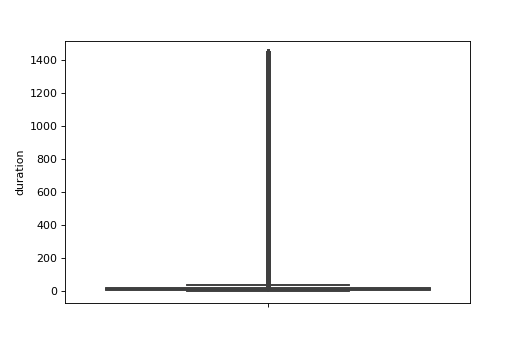

<AxesSubplot:ylabel='duration'>

In [17]:
sns.boxplot(y=df['duration'])

In [21]:
for i in range(0,101,10):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['duration'],i)))

The 0th percentile of duration attribute is :0.0
The 10th percentile of duration attribute is :4.016666666666667
The 20th percentile of duration attribute is :5.733333333333333
The 30th percentile of duration attribute is :7.35
The 40th percentile of duration attribute is :9.016666666666667
The 50th percentile of duration attribute is :10.883333333333333
The 60th percentile of duration attribute is :13.083333333333334
The 70th percentile of duration attribute is :15.850000000000001
The 80th percentile of duration attribute is :19.716666666666665
The 90th percentile of duration attribute is :26.466666666666665
The 100th percentile of duration attribute is :1439.9666666666667


In [22]:
for i in range(90,101,1):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['duration'],i)))

The 90th percentile of duration attribute is :26.466666666666665
The 91th percentile of duration attribute is :27.53333333333333
The 92th percentile of duration attribute is :28.75
The 93th percentile of duration attribute is :30.15
The 94th percentile of duration attribute is :31.816666666666666
The 95th percentile of duration attribute is :33.86666666666667
The 96th percentile of duration attribute is :36.483333333333334
The 97th percentile of duration attribute is :40.05
The 98th percentile of duration attribute is :45.3
The 99th percentile of duration attribute is :54.85
The 100th percentile of duration attribute is :1439.9666666666667


In [23]:
df.shape

(12210952, 10)

In [25]:
#removing data based on our analysis and TLC regulations
# i.e. duration should be between 1 and 720mins(12hrs)
df = df[(df.duration>1) & (df.duration<720)]

In [26]:
df.shape

(12093193, 10)

<AxesSubplot:ylabel='duration'>

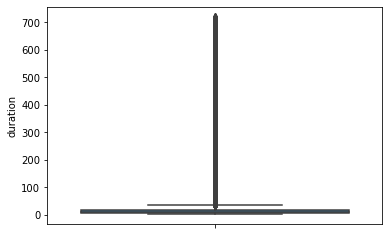

In [34]:
#box-plot after removal of outliers
sns.boxplot(y=df['duration'])

<AxesSubplot:xlabel='duration', ylabel='Count'>

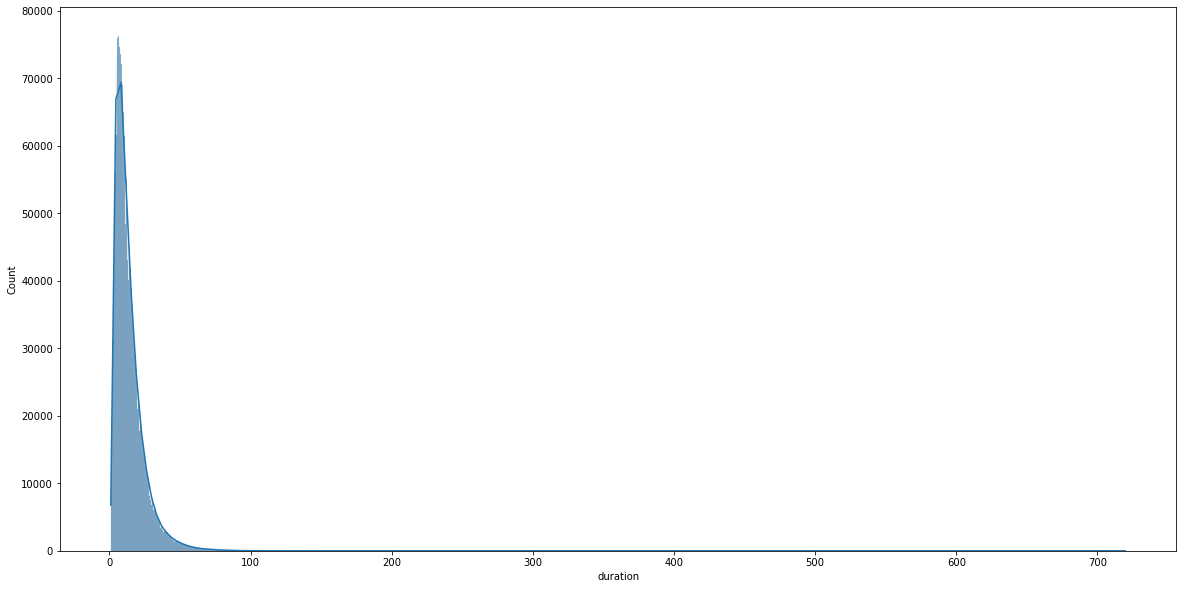

In [40]:
# fig, ax = plt.Figure(figsize=(40,6))
rcParams['figure.figsize'] = 20,10
sns.histplot(df['duration'],kde=True)

As we can see it is an right skewed graph

#### This graph might represent Log-Normal so we will log() the values and check if the distribution is normal/gaussian.

<AxesSubplot:xlabel='duration', ylabel='Count'>

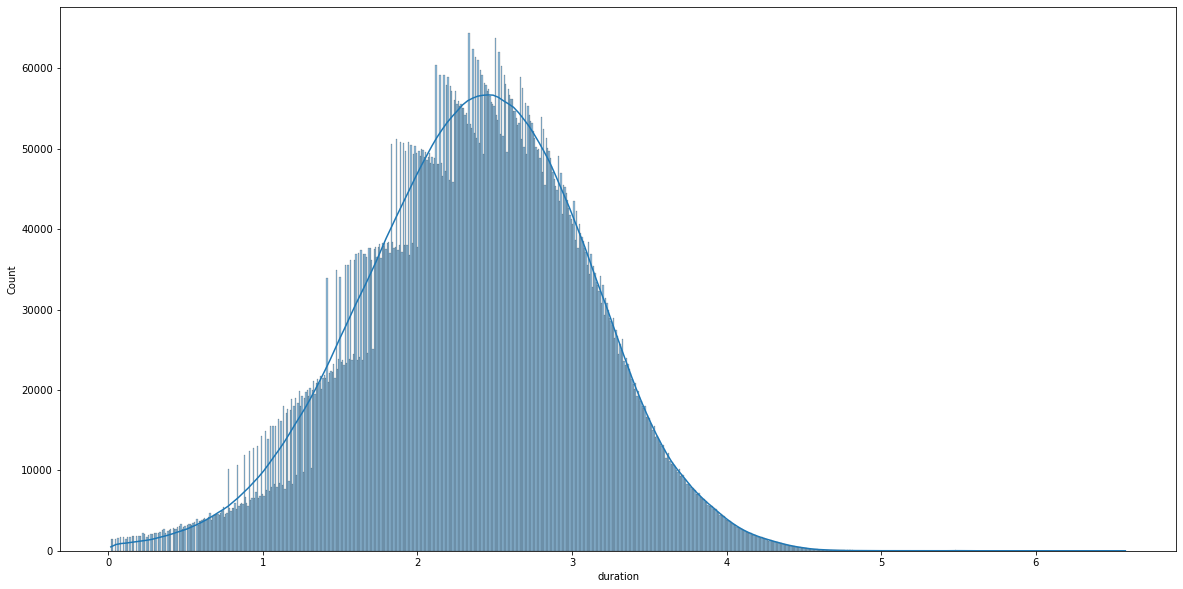

In [44]:
sns.histplot(np.log(df['duration']),kde=True)

#### This is almost normal dist, with some right skew.

In [43]:
np.log(df['duration'])

0        2.068970
1        2.406945
2        3.437208
7        2.775709
8        1.606099
           ...   
13035    5.638058
13036    4.776880
13039    5.942887
13040    6.432404
13041    6.058812
Name: duration, Length: 12093193, dtype: float64

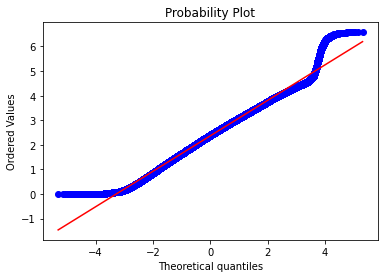

In [48]:
ax = plt.subplot(111)
scipy.stats.probplot(np.log(df['duration']),plot=ax)
plt.show()

### So it is little off from normal dist at the ends. 

## 4. Speed

<AxesSubplot:ylabel='speed'>

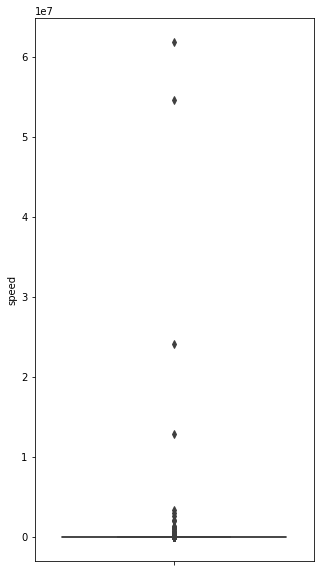

In [50]:
rcParams['figure.figsize'] = 5,10
sns.boxplot(y=df['speed'])

In [59]:
for i in range(0,90,10):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['speed'],i)))
for i in range(90,99,1):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['speed'],i)))
for i in np.linspace(99.0,100.0,11):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['speed'],i)))

The 0th percentile of duration attribute is :0.0
The 10th percentile of duration attribute is :5.915492957746478
The 20th percentile of duration attribute is :7.285714285714286
The 30th percentile of duration attribute is :8.392156862745098
The 40th percentile of duration attribute is :9.444866920152089
The 50th percentile of duration attribute is :10.542056074766355
The 60th percentile of duration attribute is :11.779141104294478
The 70th percentile of duration attribute is :13.317567567567567
The 80th percentile of duration attribute is :15.524999999999999
The 90th percentile of duration attribute is :19.726027397260275
The 91th percentile of duration attribute is :20.417910447761194
The 92th percentile of duration attribute is :21.19935170178282
The 93th percentile of duration attribute is :22.10232558139535
The 94th percentile of duration attribute is :23.13847158897581
The 95th percentile of duration attribute is :24.36
The 96th percentile of duration attribute is :25.827232796486

In [60]:
df.shape

(12093193, 10)

In [61]:
#removing further outliers based on the 99.9th percentile value
df=df[(df.speed>0) & (df.speed<44.54)]

In [62]:
df.shape

(12068027, 10)

In [65]:
#avg.speed of cabs in New-York
df.speed.mean()

11.916955185455928

<b style='font-size:16px'>The avg speed in Newyork speed is 11.92miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

## 4. Trip Distance

<AxesSubplot:ylabel='trip_distance'>

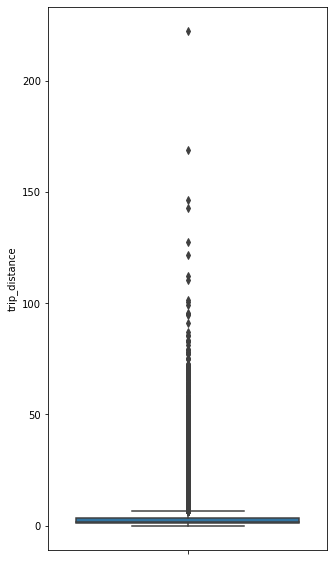

In [67]:
rcParams['figure.figsize'] = 5,10
sns.boxplot(y=df['trip_distance'])

In [68]:
for i in range(0,90,10):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['trip_distance'],i)))
for i in range(90,99,1):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['trip_distance'],i)))
for i in np.linspace(99.0,100.0,11):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['trip_distance'],i)))

The 0th percentile of duration attribute is :0.01
The 10th percentile of duration attribute is :0.69
The 20th percentile of duration attribute is :0.9
The 30th percentile of duration attribute is :1.13
The 40th percentile of duration attribute is :1.4
The 50th percentile of duration attribute is :1.7
The 60th percentile of duration attribute is :2.1
The 70th percentile of duration attribute is :2.72
The 80th percentile of duration attribute is :3.8
The 90th percentile of duration attribute is :6.7
The 91th percentile of duration attribute is :7.35
The 92th percentile of duration attribute is :8.1
The 93th percentile of duration attribute is :8.89
The 94th percentile of duration attribute is :9.6
The 95th percentile of duration attribute is :10.4
The 96th percentile of duration attribute is :11.46
The 97th percentile of duration attribute is :13.57
The 98th percentile of duration attribute is :16.91
The 99.0th percentile of duration attribute is :18.51
The 99.1th percentile of duration 

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

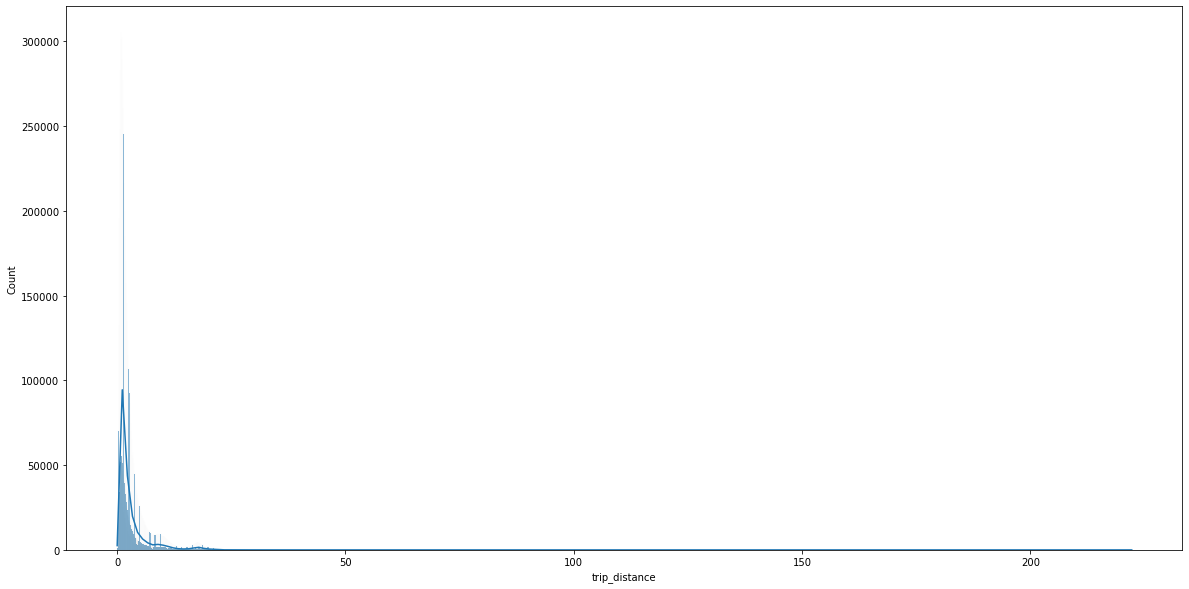

In [69]:
rcParams['figure.figsize'] = 20,10
sns.histplot(df['trip_distance'],kde=True)

In [70]:
df.shape

(12068027, 10)

In [71]:
#removing further outliers based on the 99.9th percentile value
df=df[(df.trip_distance>0) & (df.trip_distance<24)]

In [72]:
df.shape

(12057201, 10)

<AxesSubplot:ylabel='trip_distance'>

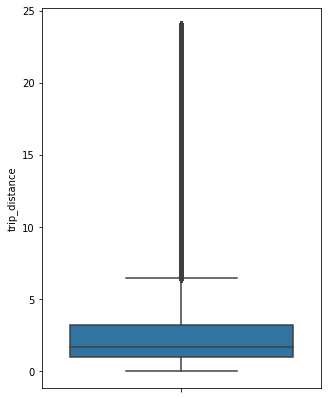

In [73]:
rcParams['figure.figsize'] = 5,7
sns.boxplot(y=df['trip_distance'])

## 5. Total Fare

<AxesSubplot:ylabel='total_amount'>

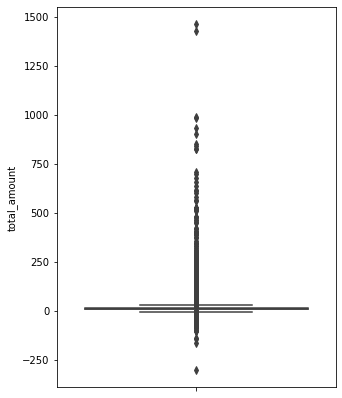

In [75]:
rcParams['figure.figsize'] = 5,7
sns.boxplot(y=df['total_amount'])

In [76]:
for i in range(0,90,10):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['total_amount'],i)))
for i in range(90,99,1):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['total_amount'],i)))
for i in np.linspace(99.0,100.0,11):
    print('The {}th percentile of duration attribute is :{}'.format(i,np.percentile(df['total_amount'],i)))

The 0th percentile of duration attribute is :-300.8
The 10th percentile of duration attribute is :6.8
The 20th percentile of duration attribute is :8.1
The 30th percentile of duration attribute is :9.3
The 40th percentile of duration attribute is :10.38
The 50th percentile of duration attribute is :11.8
The 60th percentile of duration attribute is :13.56
The 70th percentile of duration attribute is :15.96
The 80th percentile of duration attribute is :19.8
The 90th percentile of duration attribute is :28.8
The 91th percentile of duration attribute is :30.84
The 92th percentile of duration attribute is :33.34
The 93th percentile of duration attribute is :36.34
The 94th percentile of duration attribute is :39.41
The 95th percentile of duration attribute is :42.99
The 96th percentile of duration attribute is :47.21
The 97th percentile of duration attribute is :52.8
The 98th percentile of duration attribute is :59.34
The 99.0th percentile of duration attribute is :69.99
The 99.1th percentil

In [94]:
df['total_amount'].sort_values()[-8400:-8398]

156072    100.0
36528     100.0
Name: total_amount, dtype: float64

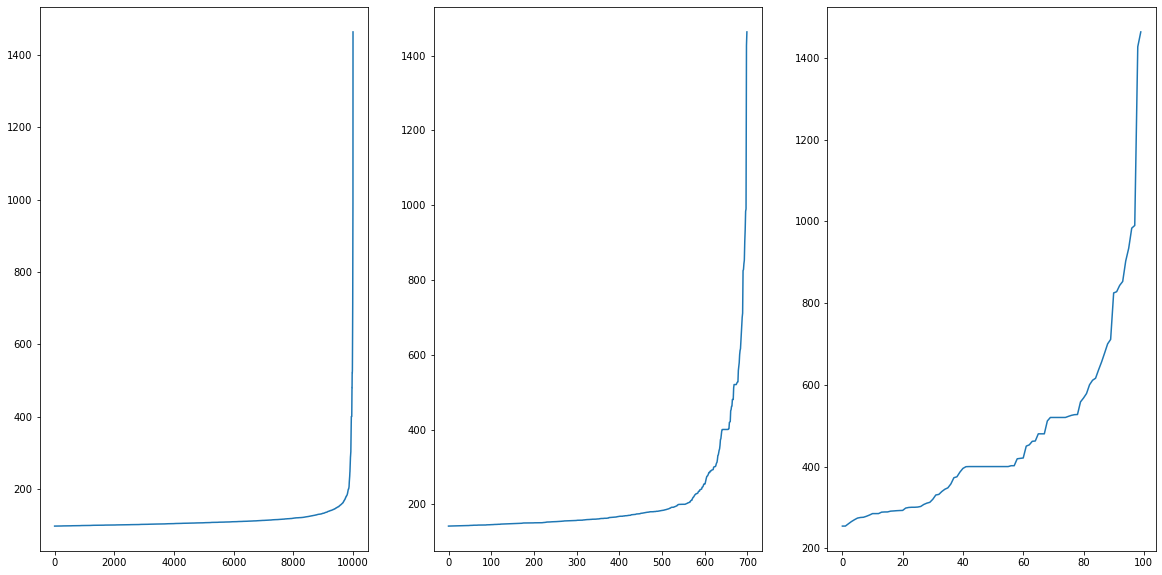

In [109]:
rcParams['figure.figsize'] = 20,10
plt.subplot(131)
plt.plot(list(df['total_amount'].sort_values()[-10000:]))
plt.subplot(132)
plt.plot(list(df['total_amount'].sort_values()[-700:]))
plt.subplot(133)
plt.plot(list(df['total_amount'].sort_values()[-100:]))
plt.show()

#### As we can see an sharp increase in the 'total_amount' near the end i.e after 200 fare amount. So we will consider 200 as out outlier bound.

In [111]:
df.shape

(12057201, 10)

In [112]:
df = df[(df.total_amount <200) & (df.total_amount >0)]

In [113]:
df.shape

(12054486, 10)

In [116]:
df.to_csv('data/step2data.csv')

### Summing every outlier removal step in one function:

In [2]:
#removing all outliers based on our univariate analysis above
def remove_outliers(df):

    df = df[['passenger_count','trip_distance','tpep_pickup_datetime','tpep_dropoff_datetime',\
                 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    df['duration'] = df.apply(dura_cal,axis=1)
    df['speed'] = 60*(df['trip_distance']/df['duration'])
    
    a = df.shape[0]
    print ("Number of pickup records = ",a)
    t_df = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                       (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                       ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                       (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]
    b = t_df.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    t_df = df[(df.duration > 0) & (df.duration < 720)]
    c = t_df.shape[0]
    print ("Number of outliers from trip duration analysis:",(a-c))
    
    # we are rounding off our bounds as the bounds will be not presisely same for each dataset.
    t_df = df[(df.trip_distance > 0) & (df.trip_distance < 25)]
    d = t_df.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    t_df = df[(df.speed <= 60) & (df.speed >= 0)]
    e = t_df.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    # for total_amount i am going to take middle ground as AAi thinks 1000 should t=be the bond and i think 200 should be the bond. so 600
    t_df = df[(df.total_amount <600) & (df.total_amount >0)]
    f = t_df.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    df = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                       (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                       ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                       (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]
    
    df = df[(df.duration > 0) & (df.duration < 720)]
    df = df[(df.trip_distance > 0) & (df.trip_distance < 25)]
    df = df[(df.speed < 60) & (df.speed > 0)]
    df = df[(df.total_amount <600) & (df.total_amount >0)]
    print ("---")
    print ("Total data before :",a)
    print ("Total data after removal of outliers :",df.shape[0])
    print ("Total outliers removed :",a - df.shape[0])
    print ("---")
    return df

In [119]:
ndf = remove_outliers(month)

Number of pickup records =  12210952
Number of outlier coordinates lying outside NY boundaries: 232444
Number of outliers from trip duration analysis: 30837
Number of outliers from trip distance analysis: 82156
Number of outliers from speed analysis: 23987
Number of outliers from fare analysis: 5887
---
Total data before : 12210952
Total data after removal of outliers : 11886328
Total outliers removed : 324624
---


# - Data-preperation
## Clustering/Segmentation

In [3]:
def clusterization(data,k):
    clu = MiniBatchKMeans(n_clusters=k,batch_size=10000,random_state=99).fit(data[['pickup_latitude', 'pickup_longitude']])
    centers = clu.cluster_centers_
    
    min_dist = 999
    for i in range(k):
        dists = list()
        for j in range(k):
            if j!=i:
                dist = gpxpy.geo.haversine_distance(centers[i][0], centers[i][1],centers[j][0], centers[j][1])
                dists.append(dist/(1.60934*1000)) 
            
        min_dist = min(min_dist,min(dists))
        lt2 = sum(np.array(dists)<=2)
        gt2 = len(dists)-lt2
    
    print('No. of Clusters: ',k)
    print('No. of Clusters within 2 mile: ',lt2)
    print('No. of Clusters further than 2 mile: ',gt2)
    print('Avg. of Min Distances: ',min_dist)
        

In [190]:
for i in range(10,101,10):
    
    clusterization(ndf,i)
    print('='*30)
    

No. of Clusters:  10
No. of Clusters within 2 mile:  0
No. of Clusters further than 2 mile:  9
Avg. of Min Distances:  0.8054068944707957
No. of Clusters:  20
No. of Clusters within 2 mile:  4
No. of Clusters further than 2 mile:  15
Avg. of Min Distances:  0.7001785521327114
No. of Clusters:  30
No. of Clusters within 2 mile:  14
No. of Clusters further than 2 mile:  15
Avg. of Min Distances:  0.4570133713392362
No. of Clusters:  40
No. of Clusters within 2 mile:  7
No. of Clusters further than 2 mile:  32
Avg. of Min Distances:  0.35635440360862947
No. of Clusters:  50
No. of Clusters within 2 mile:  17
No. of Clusters further than 2 mile:  32
Avg. of Min Distances:  0.18762600803268542
No. of Clusters:  60
No. of Clusters within 2 mile:  28
No. of Clusters further than 2 mile:  31
Avg. of Min Distances:  0.23235748388749222
No. of Clusters:  70
No. of Clusters within 2 mile:  32
No. of Clusters further than 2 mile:  37
Avg. of Min Distances:  0.1759123967325982
No. of Clusters:  80


In [ ]:
### k=30 looks good for random_state=99

In [19]:
# Plotting the cluster centers on OSM
clu = MiniBatchKMeans(n_clusters=30,batch_size=10000,random_state=99).fit(ndf[['pickup_latitude', 'pickup_longitude']])
#     centers = clu.cluster_centers_
cluster_centers = clu.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm;

In [192]:
# Getting 30 clusters using the kmeans 
ndf['cluster'] = clu.predict(ndf[['pickup_latitude', 'pickup_longitude']])

In [5]:
#Visualising the clusters on a map
def plot_clusters(df):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(df.pickup_longitude.values, df.pickup_latitude.values, s=10, lw=0,
               c=df.cluster.values, cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.close()
    # plt.show()

plot_clusters(ndf)

In [198]:
ndf.to_csv('data/ndf.csv')

---- 
Checkpoint

----

In [8]:
ndf = pd.read_csv('data/ndf.csv',index_col=0)

In [9]:
ndf.reset_index(drop=True,inplace=True)

In [33]:
dt = datetime(2015, 3, 1)
time.mktime(datetime(2015, 3, 1).timetuple())+19800

1425168000.0

In [10]:
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

In [31]:
(1420070400-1420050600)

19800

In [11]:
def time_binning(df,y,m):
    # unix_pickup_times=[i for i in df['pickup_times'].values]
    # unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
    #                 [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    # start_pickup_unix=unix_times[year-2015][month-1]
    
    df['unix_pickup'] = df.tpep_pickup_datetime.apply(lambda x: time.mktime(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple()))
    std_unix = time.mktime(datetime(y,m,1).timetuple())+19800
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    bins=[int(((i+19800)-std_unix)/600) for i in df['unix_pickup'].values] # this can aslo be thought as  [(i+19800) - std_unix]/600 similar to what we did while computing std_unix
    df['pickup_bins'] = np.array(bins)
    return df

In [12]:
ndf = time_binning(ndf,2016,3)

In [13]:
ndf_gb = ndf[['cluster','pickup_bins','trip_distance']].groupby(['cluster','pickup_bins']).count()

In [14]:
ndf_gb

trip_distance
cluster pickup_bins               
0       0                       40
        1                       36
        2                       35
        3                       34
        4                       22
...                            ...
29      4459                   174
        4460                   168
        4461                   167
        4462                   140
        4463                   147

[132635 rows x 1 columns]

* ### Data Preparation Function

In [152]:
# upto now we cleaned data and prepared data for the month 2016,

# now do the same operations for months Jan, Feb, March of 2015
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickuo_bin'

# Data Preparation for the months of Jan,Feb and March 2015
def data_preparation(df,kmeans,y,m):

    print ("Claculating 'duration' and 'speed' & Remove outliers..")
    df = remove_outliers(df)
    
    print ("Estimating clusters..")
    df['cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    df = time_binning(df,y,m)
    df_gb = df[['cluster','pickup_bins','trip_distance']].groupby(['cluster','pickup_bins']).count()
    print('Completed')
    return df,df_gb    


In [20]:
jan_2015 = dd.read_csv('data/raw/yellow_tripdata_2015-01.csv')
feb_2015 = dd.read_csv('data/raw/yellow_tripdata_2015-02.csv')
mar_2015 = dd.read_csv('data/raw/yellow_tripdata_2015-03.csv')

df_1501,dfgb_1501 = data_preparation(jan_2015,clu,2015,1)
df_1502,dfgb_1502 = data_preparation(feb_2015,clu,2015,2)
df_1503,dfgb_1503 = data_preparation(mar_2015,clu,2015,3)

Claculating 'duration' and 'speed' & Remove outliers..


NameError: name 'dura_cal' is not defined

In [ ]:
jan_2016 = dd.read_csv('data/raw/yellow_tripdata_2016-01.csv')
df_1601,dfgb_1601 = data_preparation(jan_2016,clu,2016,1)

In [119]:
clu_tbins = list()
for i in range(30):
    clu_tbins.append(set(dfgb_1601.loc[i].index))

4375
4390
4285
4355
4394
4383
4264
4372
4394
4394
4378
4379
4380
4397
4382
4388
4254
4385
4372
4356
4392
4385
3660
4387
4382
4363
4385
4388
4391
4394


## - Smoothing

In [153]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups

#AAi method
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

# Alternat - My method
def unique_cluster_time_bins(df):
    clu_tbins = list()
    for i in range(30):
        clu_tbins.append(set(df.loc[i].index))
    return clu_tbins

In [23]:
dfgb_1603 = ndf_gb
df_1603 = ndf
uni_clu_tbins_1501 = unique_cluster_time_bins(dfgb_1501)
uni_clu_tbins_1502 = unique_cluster_time_bins(dfgb_1502)
uni_clu_tbins_1503 = unique_cluster_time_bins(dfgb_1503)
uni_clu_tbins_1601 = unique_cluster_time_bins(dfgb_1601)
uni_clu_tbins_1603 = unique_cluster_time_bins(dfgb_1603)

#### We have been doing all the first shot processing on the 2016/03 data hence will continue to do so using db_1603 and dfgb_1603

In [24]:
len(df_1603.pickup_bins.unique())

4464

In [167]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(30):
    print("for the ",i,"th cluster number of 10min intervals with zero pickups: ",4464 - len(uni_clu_tbins_1603[i]))
    print('-'*60)

for the  0 th cluster number of 10min intervals with zero pickups:  6
------------------------------------------------------------
for the  1 th cluster number of 10min intervals with zero pickups:  6
------------------------------------------------------------
for the  2 th cluster number of 10min intervals with zero pickups:  107
------------------------------------------------------------
for the  3 th cluster number of 10min intervals with zero pickups:  16
------------------------------------------------------------
for the  4 th cluster number of 10min intervals with zero pickups:  5
------------------------------------------------------------
for the  5 th cluster number of 10min intervals with zero pickups:  5
------------------------------------------------------------
for the  6 th cluster number of 10min intervals with zero pickups:  138
------------------------------------------------------------
for the  7 th cluster number of 10min intervals with zero pickups:  6
--------

In [25]:
# AAI method

# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data


def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,30):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

#### My method

In [26]:
w0_dfgb_1603 = dfgb_1603.unstack(fill_value=0)
w0_dfgb_1603

trip_distance                                               ...  \
pickup_bins          0    1    2    3    4    5    6    7    8    9     ...   
cluster                                                                 ...   
0                      40   36   35   34   22   21   16   29   15    9  ...   
1                     106   90   93   82   85   64   58   48   62   52  ...   
2                      77   59   45   48   42   51   51   37   21    5  ...   
3                      40   22   11   27   33    9    2    7    6    4  ...   
4                      39   31   13   26   19   12   15   20   19   17  ...   
5                      45   55   45   28   29   29   30   30   29   14  ...   
6                       9   11    9   11    5   10    9   10    8    4  ...   
7                      19   21   30   20   18   19   23   10   13   18  ...   
8                      47   53   45   43   34   24   30   20   20   12  ...   
9                      60   57   47   55   45   57   50   41   37   34  ...   
10                     61   64   35   53   44   34   27   36   33   20  ...   
11                     15   14    8    6   14   17   16    9    3    9  ...   
12                     75   73   60   47   34   46   41   37   26   46  ...   
13                     21   18   18    7   14   20   14   25   17   11  ...   
14                     14   14   17   22   16   16   11    7   14    9  ...   
15                     89   52   62   50   39   53   27   37   32   44  ...   
16                     27   36   34   30   26   26   23   25   33   27  ...   
17                     85   73   83   64   62   53   49   33   36   34  ...   
18                     36   38   42   20   27   23   25   19   20   24  ...   
19                     18   15   10    5    3    6    2   14   10    4  ...   
20                    121   83   70   86   87   66   66   55   51   54  ...   
21                     51   72   36   52   53   37   40   49   39   27  ...   
22                      3    0    0    4    0    0    0    1    1    1  ...   
23                     84   81   43   55   54   32   32   35   26   32  ...   
24                     53   44   33   27   33   33   25   13   21   13  ...   
25                     27   20   15   23   18   13   12   17   25   14  ...   
26                     26   19   17   14   15    8   17   18   14   14  ...   
27                     75   65   82   71   68   67   74   41   37   33  ...   
28                     45   25   24   30   25   21   21   18   10   14  ...   
29                     51   52   41   36   19   34   18   30   17   17  ...   

                                                               
pickup_bins 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463  
cluster                                                        
0            131  130  129  126  129  138  123  129  108   88  
1            383  333  289  307  287  308  273  282  229  221  
2             80   87   82   79   78   84   78   49   67   65  
3            140  138  131  144  147  138  129  145   82   71  
4            122   89  112  108  101  104   82   84   69   65  
5            189  215  172  187  160  148  142  152  141  114  
6             15   20   19   18   19   14   20   16   20   22  
7             44   63   51   43   49   48   48   48   42   49  
8            119  154  148  141  112  113   90   88   76   84  
9            215  204  215  211  228  221  208  228  197  185  
10           185  151  171  157  166  206  162  186  164  171  
11            90   79   91   75   68   64   76   43   40   44  
12           226  214  216  234  210  240  196  223  206  239  
13            12   12   22   15   18   11   21   20   13   16  
14            14   23   19   13   21   21   20   19   29   14  
15           204  196  224  199  197  199  157  159  148  126  
16            26   25   37   34   44   47   57   50   42   43  
17           206  220  217  221  255  235  219  225  238  226  
18           164  145  139  128  142  119  121   96  100   8

In [190]:
w0_dfgb_1603.shape[1]==(6*24*31) # is the all possible 10 min time intervals in the month of March i.e 4464 

True

#### Checking our method vs AAI method provide us with the same output

In [200]:
list(w0_dfgb_1603.stack().trip_distance.values);

In [245]:
temp_tbins = fill_missing(dfgb_1603.trip_distance.values,uni_clu_tbins_1603)

In [201]:
temp_tbins;

In [202]:
list(w0_dfgb_1603.stack().trip_distance.values)==temp_tbins

True

#### Hence we can see our output are totallt same

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

In [27]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,30):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [216]:
smth_dfgb_1603 = smoothing(dfgb_1603.trip_distance.values,uni_clu_tbins_1603)

In [221]:
len(smth_dfgb_1603) == 30*4464 # No of clusers * No of time bins in march month

True

In [222]:
print(len(w0_dfgb_1603.stack().trip_distance.values)) 
print(len(temp_tbins))
print(len(smth_dfgb_1603))
print(30*4464)

133920
133920
133920
133920


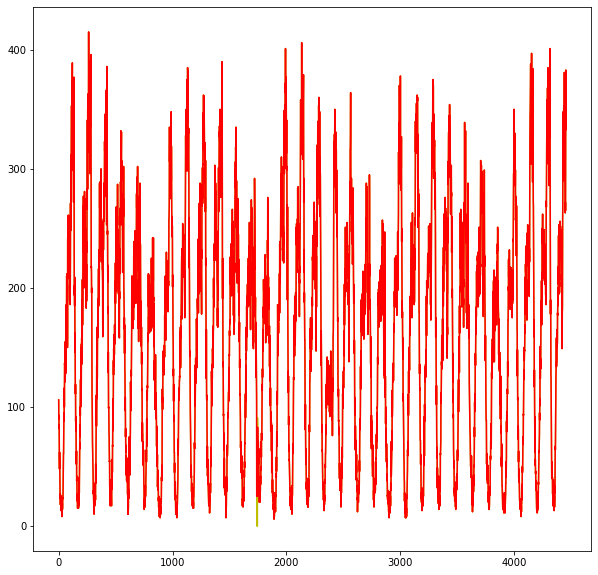

In [270]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,10),frameon=False)
plt.plot(temp_tbins[4464:8920], label="zero filled values",c='y')
plt.plot(smth_dfgb_1603[4464:8920], label="filled with avg values",c='r' )
# plt.legend()
plt.show()

In [251]:
np.array(temp_tbins[4464:8920])

array([106,  90,  93, ..., 300, 383, 333], dtype=int64)

In [272]:
# Mar-2016 data is smoothed, Jan,Feb & March 2015 data missing values are filled with zero
# smth_dfgb_1603 = smoothing(dfgb_1603.trip_distance.values,uni_clu_tbins_1603)


w0_cnt_1501=list(dfgb_1501.unstack(fill_value=0).stack().trip_distance.values)
w0_cnt_1502=list(dfgb_1502.unstack(fill_value=0).stack().trip_distance.values)
w0_cnt_1503=list(dfgb_1503.unstack(fill_value=0).stack().trip_distance.values)



In [279]:
len(w0_cnt_1501) == 24*31*6*30, len(w0_cnt_1502) == 24*28*6*30,len(w0_cnt_1503) == 24*31*6*30

(True, True, True)

In [292]:
# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]

# number of 10min indices for march 2016= 24*31*60/10 = 4464
# number of 10min indices for jan 2015 = 24*31*60/10 = 4464
# number of 10min indices for feb 2015 = 24*28*60/10 = 4032
# number of 10min indices for march 2015 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4032+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,30):
    regions_cum.append(w0_cnt_1501[4464*i:4464*(i+1)]+w0_cnt_1502[4032*i:4032*(i+1)]+w0_cnt_1503[4464*i:4464*(i+1)])

In [293]:
len(regions_cum)

30

In [294]:
# 4464+4032+4464 = 12960
for i in range(30):
    print(len(regions_cum[i]))

12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960
12960


* ## Time series and Fourier Transforms

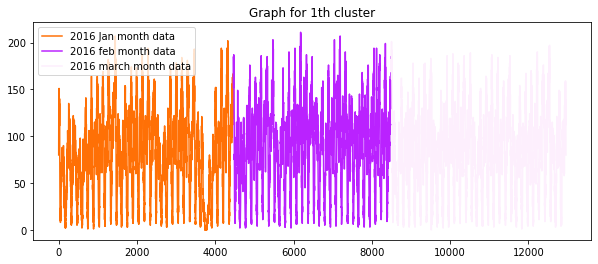

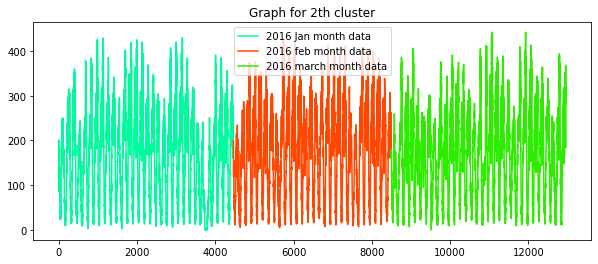

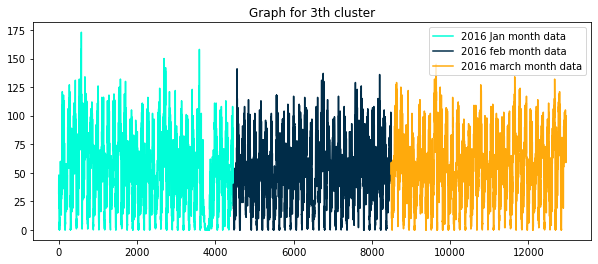

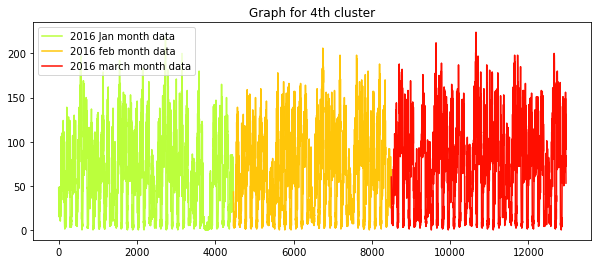

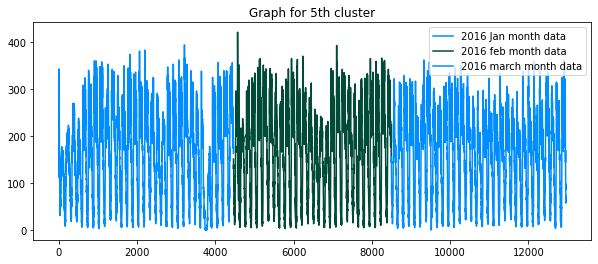

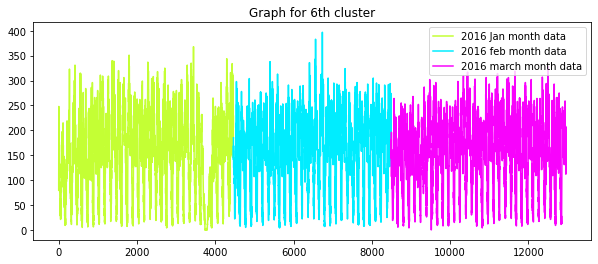

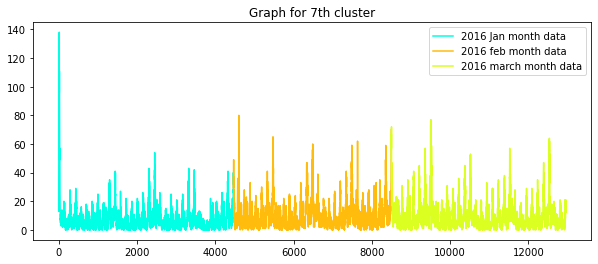

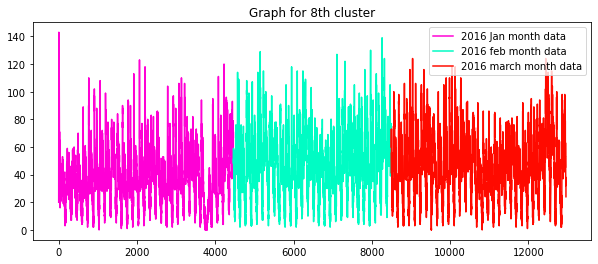

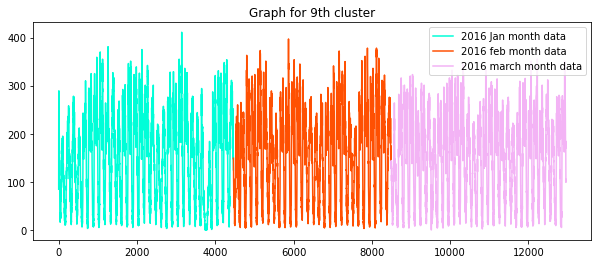

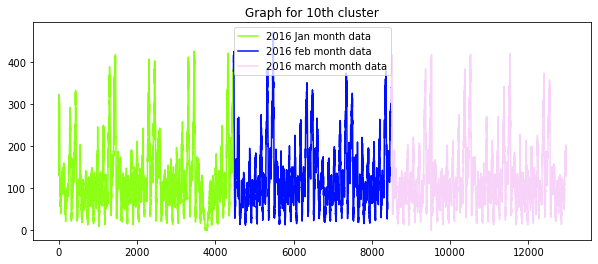

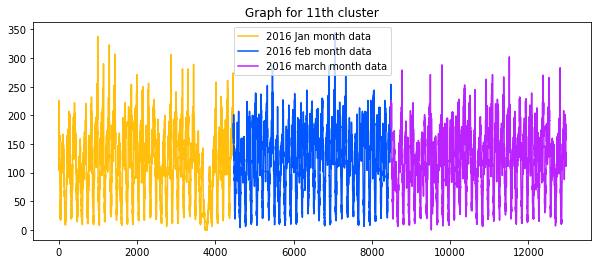

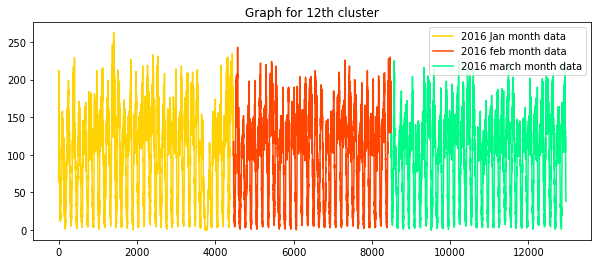

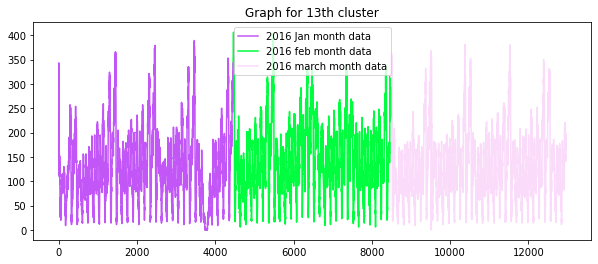

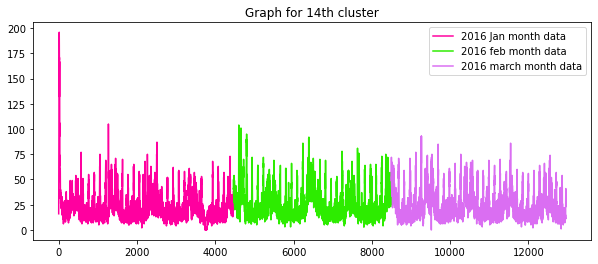

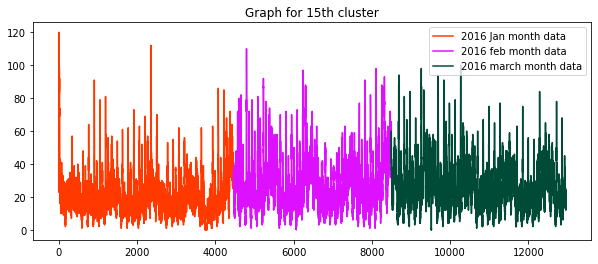

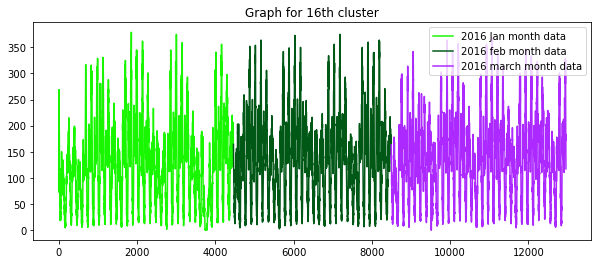

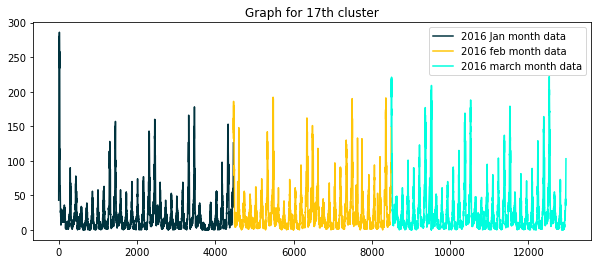

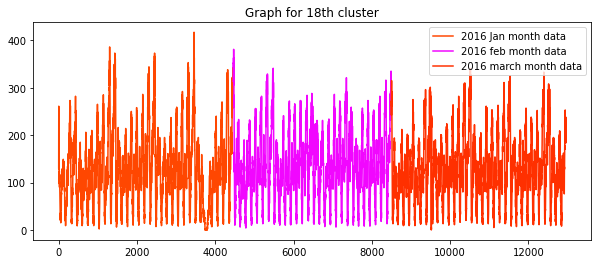

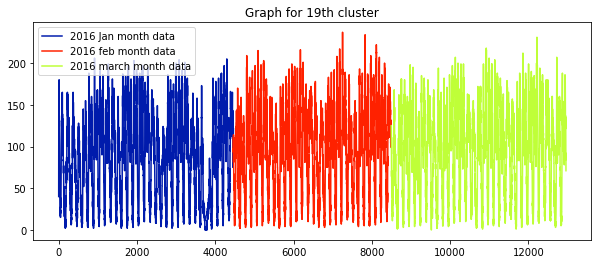

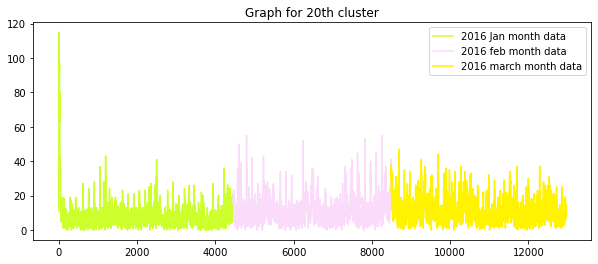

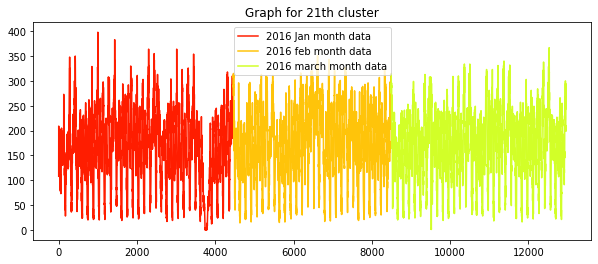

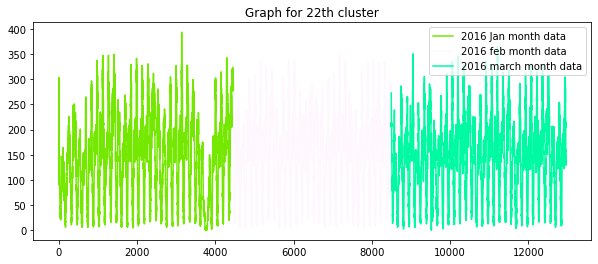

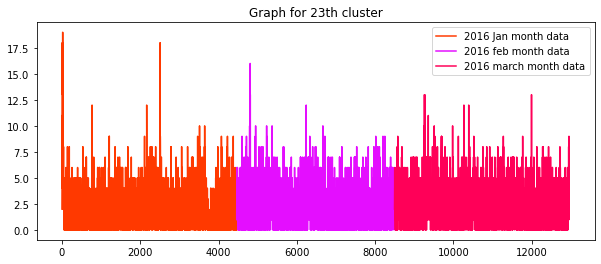

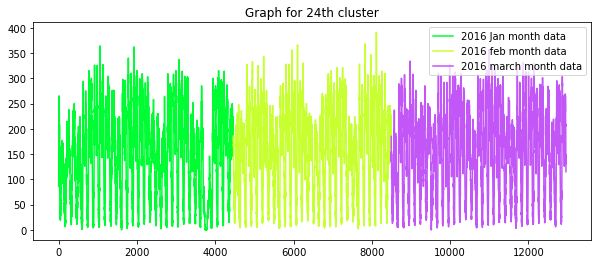

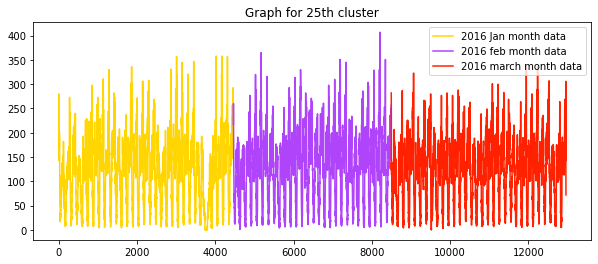

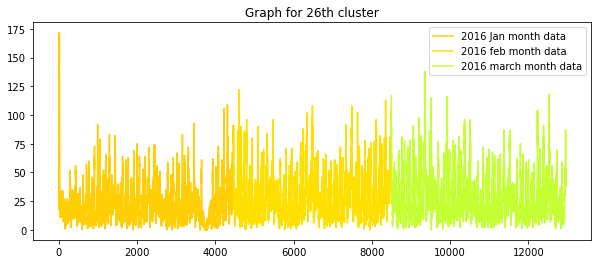

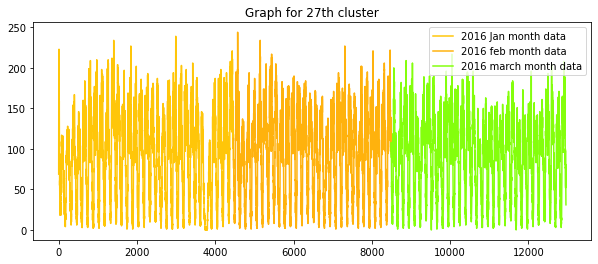

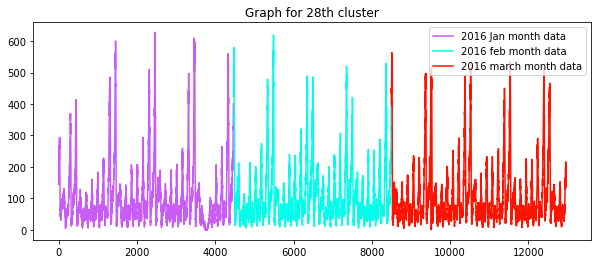

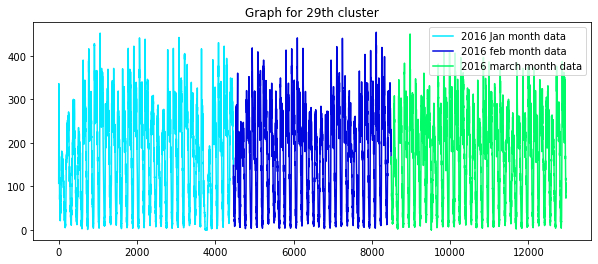

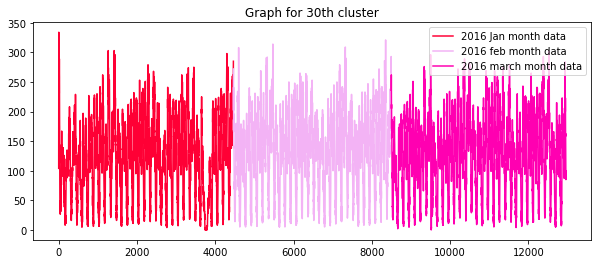

In [302]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
first_x = list(range(0,4464))
second_x = list(range(4464,8496))
third_x = list(range(8496,12960))
for i in range(30):
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8496], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regions_cum[i][8496:], color=uniqueish_color(), label='2016 march month data')
    plt.title('Graph for {}th cluster'.format(i+1))
    plt.legend()
    plt.show()

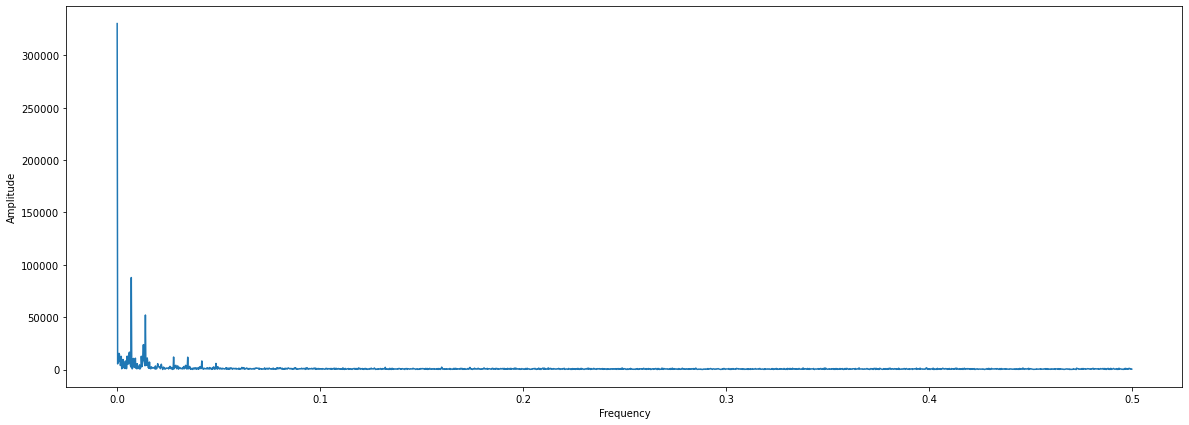

In [311]:
# getting peaks: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y    = np.fft.fft(np.array(smth_dfgb_1603)[0:4464]) # using data of march 2016 of cluster 1
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4460, 1)
n = len(freq)
plt.figure(figsize=(20,7))
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [69]:
#Preparing the Dataframe only with x(i) values as march-2016 data and y(i) values as march-2015
ratios_march = pd.DataFrame()
ratios_march['Given']=smth_dfgb_1603
ratios_march['Prediction']=w0_cnt_1503
ratios_march['Ratios']=ratios_march['Prediction']*1.0/ratios_march['Given']*1.0

In [316]:
ratios_march

Given  Prediction    Ratios
0          40         169  4.225000
1          36         182  5.055556
2          35         180  5.142857
3          34         169  4.970588
4          22         196  8.909091
...       ...         ...       ...
133915    174         133  0.764368
133916    168         107  0.636905
133917    167          85  0.508982
133918    140          87  0.621429
133919    147         100  0.680272

[133920 rows x 3 columns]

## Modelling: Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 

1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{align}$

2. Using Previous known values of the 2016 data itself to predict the future values

### Simple Moving Averages
The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 

### Using Ratio Values - $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{align}$

In [320]:
# one cluster
24*6*31

4464

In [118]:
# smth_dfgb_1603[0:4464]
# w0_cnt_1503[0:4464]

# df1 = smth_dfgb_1603 # train data
# df2 = w0_cnt_1503# test data

def sim_mov_avg(df1,df2,n):
    preds = list()
    preds.append(df2[0])
    error = list()
    error.append(0)
    # error1 = list()
    # error1.append(0)
    for i in range(1,133920):
        indx = max(i-n,0)
        ratio = sum([i/j for i,j in zip(df2[indx:i],df1[indx:i])])/(i-indx)
        pred_i = ratio*df1[i]
        preds.append(pred_i)
        # error1.append(abs(df2[i]-pred_i)/max(1,abs(df2[i])))
        error.append(abs(math.pow(df2[i]-int(pred_i),1)))

    y = np.array(w0_cnt_1503)
    y_pred = np.array(preds)

    # mape = sum(error1)/len(error1)
    mape_err = (sum(error)/len(error))/(sum(y)/len(y))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For n= {} \n MAPE: {} \n MSE: {}'.format(n,mape_err,mse_err))
    return mape_err,mse_err 

In [120]:
for i in range(1,8):
    sim_mov_avg(smth_dfgb_1603,w0_cnt_1503,i)

For n= 1 
 MAPE: 0.1881094398330249 
 MSE: 26497.781145459976
For n= 2 
 MAPE: 0.1787257273869427 
 MSE: 23346.68452060932
For n= 3 
 MAPE: 0.18161743718902607 
 MSE: 33323.029577359615
For n= 4 
 MAPE: 0.18882249586113622 
 MSE: 45495.081907108724
For n= 5 
 MAPE: 0.1980599107422901 
 MSE: 61449.9875
For n= 6 
 MAPE: 0.2081186588161095 
 MSE: 79404.03341547192
For n= 7 
 MAPE: 0.2181241937535027 
 MSE: 81232.17676224612


For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{align}R_{t} = ( R_{t-1} + R_{t-2})/2 \end{align}$

Next we use the Moving averages of the 2015  values itself to predict the future value using $\begin{align}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{align}$

In [123]:
def sim_mov_avg_direct(df1,n):
    preds = list()
    preds.append(df1[0])
    error = list()
    error.append(0)
    for i in range(1,133920):
        indx = max(i-n,0)
        sumoflast_nvalues_byn = sum(df1[indx:i])/(i-indx)
        preds.append(sumoflast_nvalues_byn)
        error.append(abs(math.pow(df1[i]-int(sumoflast_nvalues_byn),1)))

    mape_err = (sum(error)/len(error))/(sum(df1)/len(df1))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For n= {} \n MAPE: {} \n MSE: {}'.format(n,mape_err,mse_err))
    return mape_err,mse_err 

In [124]:
for i in range(1,8):
    sim_mov_avg_direct(w0_cnt_1503,i)

For n= 1 
 MAPE: 0.11792100440489088 
 MSE: 286.1540397252091
For n= 2 
 MAPE: 0.11598736241994219 
 MSE: 286.3942502986858
For n= 3 
 MAPE: 0.12204000964623057 
 MSE: 321.11155167264036
For n= 4 
 MAPE: 0.1309588397932153 
 MSE: 371.52221475507764
For n= 5 
 MAPE: 0.14103864176014247 
 MSE: 430.10135155316607
For n= 6 
 MAPE: 0.15162126930605366 
 MSE: 495.95253136200716
For n= 7 
 MAPE: 0.16290870098790572 
 MSE: 569.7561827956989


For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{align}P_{t} = P_{t-1} \end{align}$

Here i was actually confused between n=1 or 2, but i went with 1 as it made more sense looking at the time series graph and even AAi preferred 1 and MSE also says 1.

### Weighted Moving Averages
The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values. Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

Weighted Moving Averages using Ratio Values - $\begin{align}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{align}$

In [127]:
def weigh_mov_avg(df1,df2,n):
    preds = list()
    preds.append(df2[0])
    error = list()
    error.append(0)
    for i in range(1,133920):
        indx = max(i-n,0)
        n_dash = i-indx
        meta = list()
        for x in range(n_dash):
            ind = indx+x
            meta.append((df2[ind]/df1[ind])*(x+1))
        deno = n_dash*((n_dash+1)/2)
        ratio = sum(meta)/deno
        # ratio = sum([i/j for i,j in zip(df2[indx:i],df1[indx:i])])/(i-indx)
        pred_i = ratio*df1[i]
        preds.append(pred_i)
        error.append(abs(math.pow(df2[i]-int(pred_i),1)))

    y = np.array(w0_cnt_1503)
    y_pred = np.array(preds)

    mape_err = (sum(error)/len(error))/(sum(y)/len(y))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For n= {} \n MAPE: {} \n MSE: {}'.format(n,mape_err,mse_err))
    return mape_err,mse_err 

In [128]:
for i in range(1,8):
    weigh_mov_avg(smth_dfgb_1603,w0_cnt_1503,i)

For n= 1 
 MAPE: 0.1881094398330249 
 MSE: 26497.781145459976
For n= 2 
 MAPE: 0.17666275434433204 
 MSE: 23040.646542712067
For n= 3 
 MAPE: 0.17578334942452306 
 MSE: 27307.041562126644
For n= 4 
 MAPE: 0.1785392500479882 
 MSE: 33440.78162335723
For n= 5 
 MAPE: 0.18306637690957073 
 MSE: 41252.30884856631
For n= 6 
 MAPE: 0.18860432200178873 
 MSE: 50268.393443847075
For n= 7 
 MAPE: 0.19462588967158473 
 MSE: 56169.983363201914


For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 3 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{align} R_{t} = (3*R_{t-1} + 2*R_{t-2} + R_{t-3} )/6 \end{align}$

Weighted Moving Averages using Previous 2015 Values - $\begin{align}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{align}$

In [130]:
def weigh_mov_avg_direct(df1,n):
    preds = list()
    preds.append(df1[0])
    error = list()
    error.append(0)
    for i in range(1,133920):
        indx = max(i-n,0)
        n2 = i-indx
        meta = [df1[indx+x]*(x+1) for x in range(n2)]
        deno = n2*((n2+1)/2)
        pred_i = sum(meta)/deno
        preds.append(pred_i)
        error.append(abs(math.pow(df1[i]-int(pred_i),1)))

    mape_err = (sum(error)/len(error))/(sum(df1)/len(df1))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For n= {} \n MAPE: {} \n MSE: {}'.format(n,mape_err,mse_err))
    return mape_err,mse_err 

In [131]:
for i in range(1,8):
    weigh_mov_avg_direct(w0_cnt_1503,i)

For n= 1 
 MAPE: 0.11792100440489088 
 MSE: 286.1540397252091
For n= 2 
 MAPE: 0.11336835066192129 
 MSE: 270.5185334528077
For n= 3 
 MAPE: 0.11548145202145522 
 MSE: 283.9622759856631
For n= 4 
 MAPE: 0.11995837344562692 
 MSE: 308.40602598566306
For n= 5 
 MAPE: 0.1255433620352652 
 MSE: 338.5740740740741
For n= 6 
 MAPE: 0.13180060991508802 
 MSE: 373.1146505376344
For n= 7 
 MAPE: 0.1385443338305291 
 MSE: 411.47962962962964


For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{align} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{align}$

### Exponential  Weighted Moving Averages
 https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size. To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

$\begin{align}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{align}$

In [138]:
def exp_weigh_mov_avg(df1,df2,alpha):
    preds = list()
    preds.append(df2[0])
    error = list()
    error.append(0)
    ratio = df2[0]/df1[0]

    for i in range(1,133920):
        rat_prev = df2[i-1]/df1[i-1]
        ratio = (alpha*rat_prev)+((1-alpha)*ratio) 
        pred_i = ratio*df1[i]
        preds.append(pred_i)
        error.append(abs(math.pow(df2[i]-int(pred_i),1)))

    y = np.array(w0_cnt_1503)
    y_pred = np.array(preds)

    mape_err = (sum(error)/len(error))/(sum(y)/len(y))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For alpha= {} \n MAPE: {} \n MSE: {}'.format(alpha,mape_err,mse_err))
    return mape_err,mse_err 

In [139]:
for i in range(1,10):
    exp_weigh_mov_avg(smth_dfgb_1603,w0_cnt_1503,(i/10))

For alpha= 0.1 
 MAPE: 0.30025859270688515 
 MSE: 31411.968593189966
For alpha= 0.2 
 MAPE: 0.22423537542985994 
 MSE: 43377.78929211469
For alpha= 0.3 
 MAPE: 0.19622236088485887 
 MSE: 42335.36694295102
For alpha= 0.4 
 MAPE: 0.1835037271946042 
 MSE: 37220.816293309435
For alpha= 0.5 
 MAPE: 0.17768730002175567 
 MSE: 32080.327822580646
For alpha= 0.6 
 MAPE: 0.17568687169456768 
 MSE: 28247.5194369773
For alpha= 0.7 
 MAPE: 0.17614928613806277 
 MSE: 25927.889717741935
For alpha= 0.8 
 MAPE: 0.17846945600673353 
 MSE: 24970.822401433692
For alpha= 0.9 
 MAPE: 0.18240977307836373 
 MSE: 25191.71634557945


#### alpha = 0.6 looks good to us

- $\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$

In [145]:
def exp_weigh_mov_avg_direct(df1,alpha):
    preds = list()
    preds.append(df1[0])
    error = list()
    error.append(0)
    p=df1[0]

    for i in range(1,133920):
        # indx = max(i-n,0)
        p = (alpha*df1[i-1])+((1-alpha)*p)
        # sumoflast_nvalues_byn = sum(df1[indx:i])/(i-indx)
        preds.append(p)
        error.append(abs(math.pow(df1[i]-int(p),1)))

    mape_err = (sum(error)/len(error))/(sum(df1)/len(df1))
    mse_err = sum([e**2 for e in error])/len(error)
    print('For alpha= {} \n MAPE: {} \n MSE: {}'.format(alpha,mape_err,mse_err))
    return mape_err,mse_err 

In [146]:
for i in range(1,10):
    exp_weigh_mov_avg_direct(w0_cnt_1503,(i/10))

For alpha= 0.1 
 MAPE: 0.25018888735419115 
 MSE: 1251.7970579450418
For alpha= 0.2 
 MAPE: 0.17275999495015046 
 MSE: 616.867689665472
For alpha= 0.3 
 MAPE: 0.14155704567761646 
 MSE: 420.9728718637993
For alpha= 0.4 
 MAPE: 0.12638682880786456 
 MSE: 337.93738799283153
For alpha= 0.5 
 MAPE: 0.1186260399022945 
 MSE: 297.67070639187574
For alpha= 0.6 
 MAPE: 0.11485531078284004 
 MSE: 277.8523521505376
For alpha= 0.7 
 MAPE: 0.11344994413777483 
 MSE: 269.66850358422937
For alpha= 0.8 
 MAPE: 0.11370860625309878 
 MSE: 269.25571983273596
For alpha= 0.9 
 MAPE: 0.11523991065437272 
 MSE: 275.0391875746715


#### alpha = 0.7 looks good to us

## Comparison between baseline models
We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

In [148]:
mean_err=[0]*10
median_err=[0]*10
mean_err[0],median_err[0]=sim_mov_avg(smth_dfgb_1603,w0_cnt_1503,2)
mean_err[1],median_err[1]=sim_mov_avg_direct(w0_cnt_1503,1)
mean_err[2],median_err[2]=weigh_mov_avg(smth_dfgb_1603,w0_cnt_1503,3)
mean_err[3],median_err[3]=weigh_mov_avg_direct(w0_cnt_1503,2)
mean_err[4],median_err[4]=exp_weigh_mov_avg(smth_dfgb_1603,w0_cnt_1503,0.6)
mean_err[5],median_err[5]=exp_weigh_mov_avg_direct(w0_cnt_1503,0.7)

For n= 2 
 MAPE: 0.1787257273869427 
 MSE: 23346.68452060932
For n= 1 
 MAPE: 0.11792100440489088 
 MSE: 286.1540397252091
For n= 3 
 MAPE: 0.17578334942452306 
 MSE: 27307.041562126644
For n= 2 
 MAPE: 0.11336835066192129 
 MSE: 270.5185334528077
For alpha= 0.6 
 MAPE: 0.17568687169456768 
 MSE: 28247.5194369773
For alpha= 0.7 
 MAPE: 0.11344994413777483 
 MSE: 269.66850358422937


In [149]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2015 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2015 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2015 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.1787257273869427       MSE:  23346.68452060932
Moving Averages (2015 Values) -                        MAPE:  0.11792100440489088        MSE:  286.1540397252091
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.17578334942452306       MSE:  27307.041562126644
Weighted Moving Averages (2015 Values) -               MAPE:  0.11336835066192129       MSE:  270.5185334528077
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.17568687169456768       MSE:  28247.5194369773
Exponential Moving Averages (2015 Values) -         MAPE:  0.113449944137

In [ ]:
<b>Plese Note:-</b> The above comparisons are made using March 2015 and March 2016 only

# - Regression Models

- ### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [154]:
jan_2016 = dd.read_csv('data/raw/yellow_tripdata_2016-01.csv')
feb_2016 = dd.read_csv('data/raw/yellow_tripdata_2016-02.csv')
mar_2016 = dd.read_csv('data/raw/yellow_tripdata_2016-03.csv')

df_1601,dfgb_1601 = data_preparation(jan_2016,clu,2016,1)
df_1602,dfgb_1602 = data_preparation(feb_2016,clu,2016,2)
df_1603,dfgb_1603 = data_preparation(mar_2016,clu,2016,3)

w0_dfgb_1601 = dfgb_1601.unstack(fill_value=0)
w0_dfgb_1602 = dfgb_1602.unstack(fill_value=0)
w0_dfgb_1603 = dfgb_1603.unstack(fill_value=0)

Claculating 'duration' and 'speed' & Remove outliers..
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip duration analysis: 27182
Number of outliers from trip distance analysis: 74842
Number of outliers from speed analysis: 21203
Number of outliers from fare analysis: 5031
---
Total data before : 10906858
Total data after removal of outliers : 10619847
Total outliers removed : 287011
---
Estimating clusters..
Final groupbying..
Completed
Claculating 'duration' and 'speed' & Remove outliers..
Number of pickup records =  11382049
Number of outlier coordinates lying outside NY boundaries: 223161
Number of outliers from trip duration analysis: 27654
Number of outliers from trip distance analysis: 77424
Number of outliers from speed analysis: 22593
Number of outliers from fare analysis: 5510
---
Total data before : 11382049
Total data after removal of outliers : 11084014
Total outliers removed : 298035
---
Est

In [155]:
with open("data/chkpt2.pickle","wb") as f:
    pickle.dump(w0_dfgb_1601, f)
    pickle.dump(w0_dfgb_1602, f)
    pickle.dump(w0_dfgb_1603, f)

In [ ]:
w0_dfgb_1602

In [ ]:
4176*30

In [ ]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,30):
    regions_cum.append(w0_cnt_1601[4464*i:4464*(i+1)]+w0_cnt_1602[4032*i:4032*(i+1)]+w0_cnt_1603[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 12960

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists
tsne_weekday = []

# its an numbpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = []


tsne_feature = [0]*number_of_time_stamps
for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

In [ ]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 40*13099 == len(output)*len(output[0])

In [ ]:
# Getting the predictions of exponential moving averages to be used as a feature in cumulative form

# upto now we computed 8 features for every data point that starts from 50th min of the day
# 1. cluster center lattitude
# 2. cluster center longitude
# 3. day of the week 
# 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
# 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
# 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
# 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
# 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

# from the baseline models we said the exponential weighted moving avarage gives us the best error
# we will try to add the same exponential weighted moving avarage at t as a feature to our data
# exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [352]:
# df_1501,dfgb_1501 
# df_1502,dfgb_1502
# df_1503,dfgb_1503
# df_1601,dfgb_1601
# df_1603,dfgb_1603

# uni_clu_tbins_1501
# uni_clu_tbins_1502
# uni_clu_tbins_1503
# uni_clu_tbins_1601
# uni_clu_tbins_1603

# w0_dfgb_1603
# smth_dfgb_1603
# w0_cnt_1501
# w0_cnt_1502
# w0_cnt_1503

with open("data/chkpt1.pickle","wb") as f:
    # pickle.dump(df_1501, f)
    # pickle.dump(df_1502, f)
    # pickle.dump(df_1503, f)
    # pickle.dump(df_1601, f)
    # pickle.dump(df_1603, f)
    # pickle.dump(dfgb_1501, f)
    # pickle.dump(dfgb_1502, f)
    # pickle.dump(dfgb_1503, f)
    # pickle.dump(dfgb_1601, f)
    # pickle.dump(dfgb_1603, f)
    pickle.dump(uni_clu_tbins_1501, f)
    pickle.dump(uni_clu_tbins_1502, f)
    pickle.dump(uni_clu_tbins_1503, f)
    pickle.dump(uni_clu_tbins_1601, f)
    pickle.dump(uni_clu_tbins_1603, f)
    pickle.dump(w0_dfgb_1603, f)
    pickle.dump(smth_dfgb_1603, f)
    pickle.dump(w0_cnt_1501, f)
    pickle.dump(w0_cnt_1502, f)
    pickle.dump(w0_cnt_1503, f)

# len(df_1501),len(df_1502),len(df_1503),len(df_1601),len(df_1603),len(dfgb_1501),len(dfgb_1502),len(dfgb_1503),len(dfgb_1601),len(dfgb_1603),len(uni_clu_tbins_1501),len(uni_clu_tbins_1502),len(uni_clu_tbins_1503),len(uni_clu_tbins_1601),len(uni_clu_tbins_1603),len(w0_dfgb_1603),len(smth_dfgb_1603),len(w0_cnt_1501),len(w0_cnt_1502),len(w0_cnt_1503)

In [28]:
with open("data/chkpt1.pickle", "rb") as f:
    # df_1501 = pickle.load(f)
    # df_1502 = pickle.load(f)
    # df_1503 = pickle.load(f)
    # df_1601 = pickle.load(f)
    # df_1603 = pickle.load(f)
    # dfgb_1501 = pickle.load(f)
    # dfgb_1502 = pickle.load(f)
    # dfgb_1503 = pickle.load(f)
    # dfgb_1601 = pickle.load(f)
    # dfgb_1603 = pickle.load(f)
    uni_clu_tbins_1501 = pickle.load(f)
    uni_clu_tbins_1502 = pickle.load(f)
    uni_clu_tbins_1503 = pickle.load(f)
    uni_clu_tbins_1601 = pickle.load(f)
    uni_clu_tbins_1603 = pickle.load(f)
    w0_dfgb_1603 = pickle.load(f)
    smth_dfgb_1603 = pickle.load(f)
    w0_cnt_1501 = pickle.load(f)
    w0_cnt_1502 = pickle.load(f)
    w0_cnt_1503 = pickle.load(f)

# len(df_1501),len(df_1502),len(df_1503),len(df_1601),len(df_1603),len(dfgb_1501),len(dfgb_1502),len(dfgb_1503),len(dfgb_1601),len(dfgb_1603),len(uni_clu_tbins_1501),len(uni_clu_tbins_1502),len(uni_clu_tbins_1503),len(uni_clu_tbins_1601),len(uni_clu_tbins_1603),len(w0_dfgb_1603),len(smth_dfgb_1603),len(w0_cnt_1501),len(w0_cnt_1502),len(w0_cnt_1503)